In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
# import ipython.display as ipd

import  sounddevice as sd

In [6]:
audio_files = glob("*.wav")
audio_files

['cat_6.wav', 'dog_barking_55.wav']

In [45]:
y, sr = librosa.load(audio_files[1])
sd.play(y, sr)

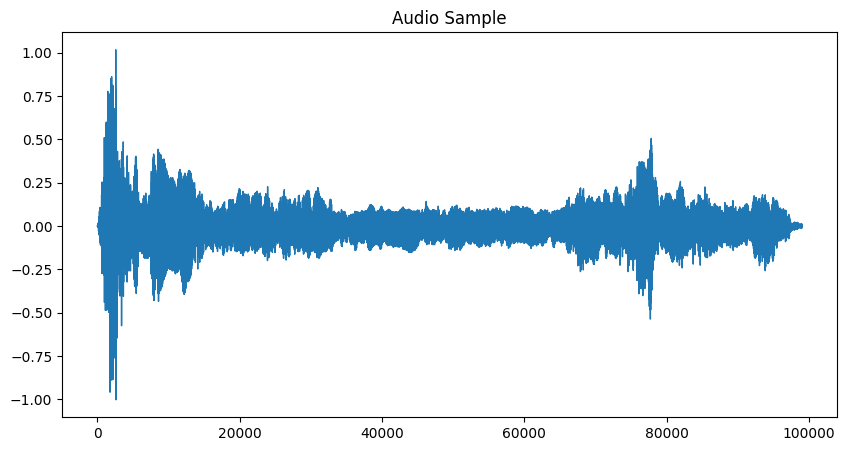

In [53]:
pd.Series(y).plot(figsize=(10,5), lw=1, title="Audio Sample")
plt.show()

<Axes: >

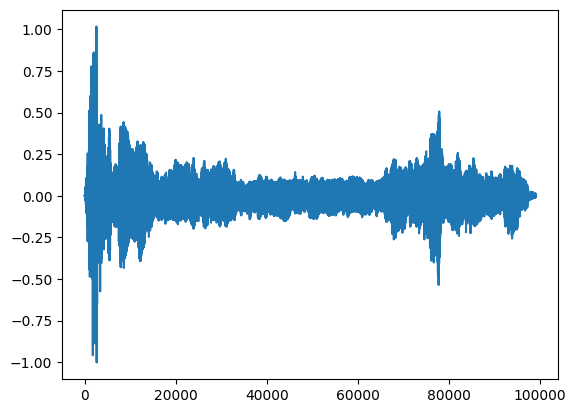

In [54]:
y_trimmed, _ = librosa.effects.trim(y, top_db=70)
pd.Series(y_trimmed).plot()

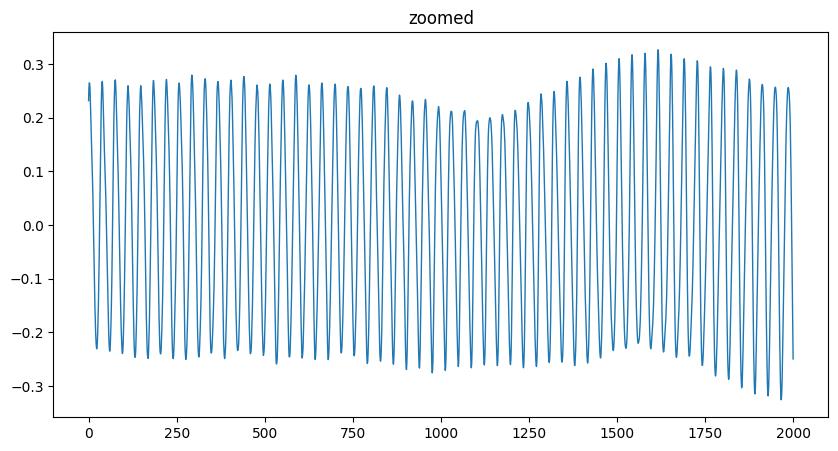

In [32]:
pd.Series(y[10000:12000]).plot(figsize=(10,5), lw=1, title="zoomed")
plt.show()

## spectograms

In [66]:
# applying fourier tranform to audio data
D = librosa.stft(y) # stft - short time audio transform
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape


(1025, 194)

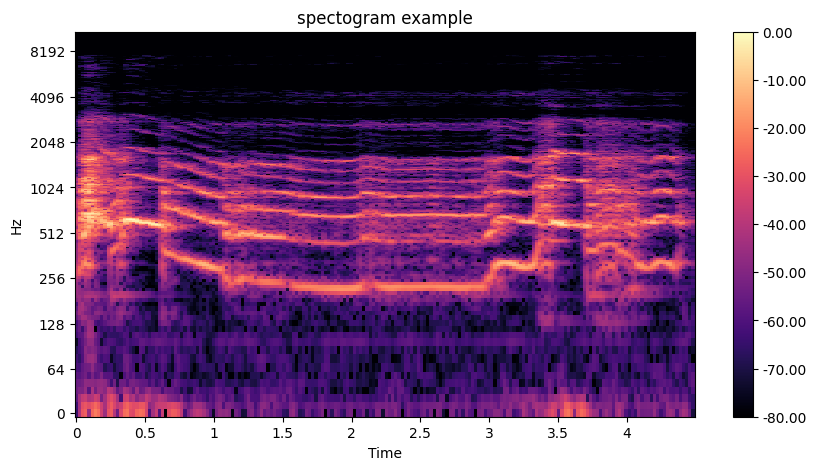

In [67]:
# plot the transformed data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis="time", y_axis="log", ax=ax)
ax.set_title("spectogram example")
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## mel spectogram

In [75]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=50)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

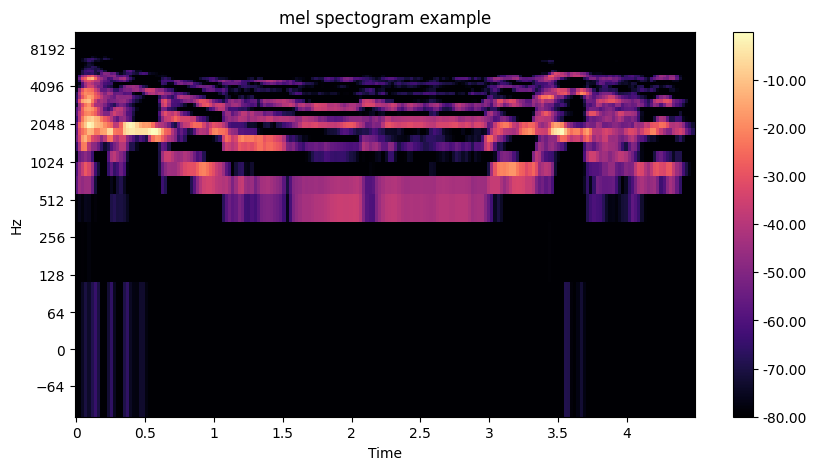

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis="time", y_axis="log", ax=ax)
ax.set_title("mel spectogram example")
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Working with audio data
1. plot and play audio
2. spectograms
3. mel spectograms

In [83]:
import pandas as pd
import numpy as np
import librosa
import sounddevice as sd # for playin audio

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

In [82]:
# get audio files
audio_files = glob("*.wav")
audio_files

['cat_6.wav', 'dog_barking_55.wav']

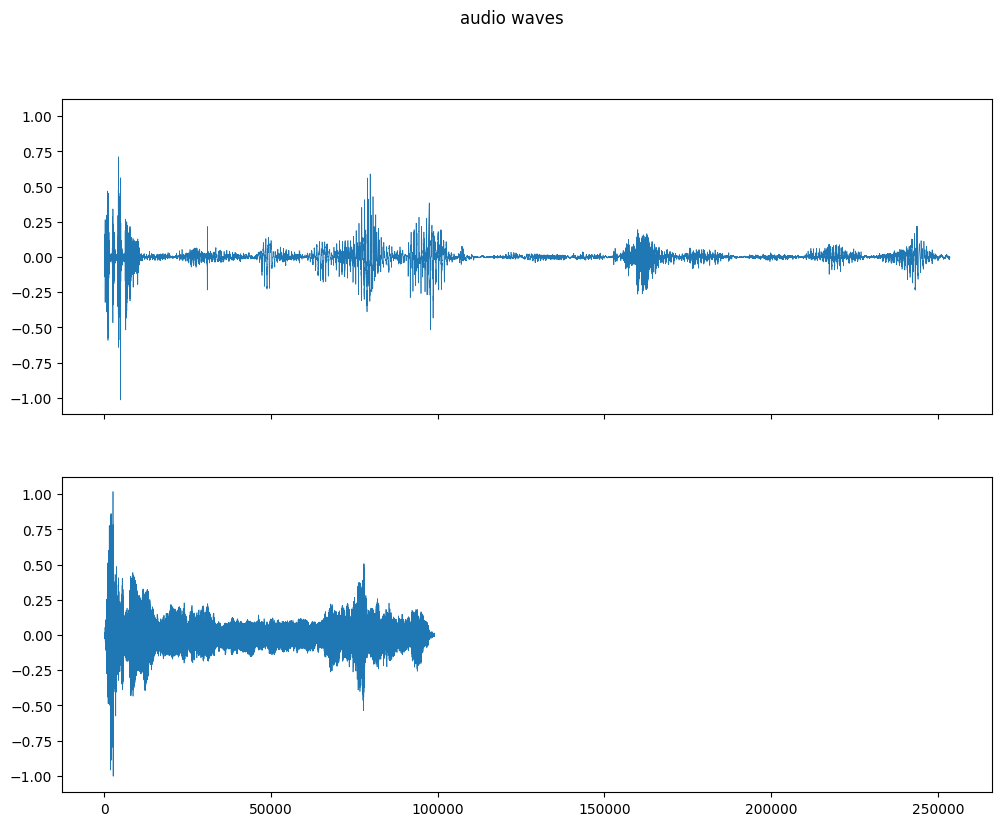

In [99]:
# load in audio files
y1, sr1 = librosa.load(audio_files[0])
y2, sr2 = librosa.load(audio_files[1])

# plot audio
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12,9))
pd.Series(y1).plot(lw=0.5, ax=axs[0])
pd.Series(y2).plot(lw=0.5, ax=axs[1])
plt.suptitle("audio waves")
plt.show()

In [100]:
# play audio
sd.play(y2, sr2)
sd.wait()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15472\524458459.py:16: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 3 Axes> than <Figure size 1600x900 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(img, ax=axs[0], format=f'%0.2f')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_15472\524458459.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 3 Axes> than <Figure size 1600x900 with 4 Axes> which fig.colorbar is called on.
  fig.colorbar(img, ax=axs[1], format=f'%0.2f')


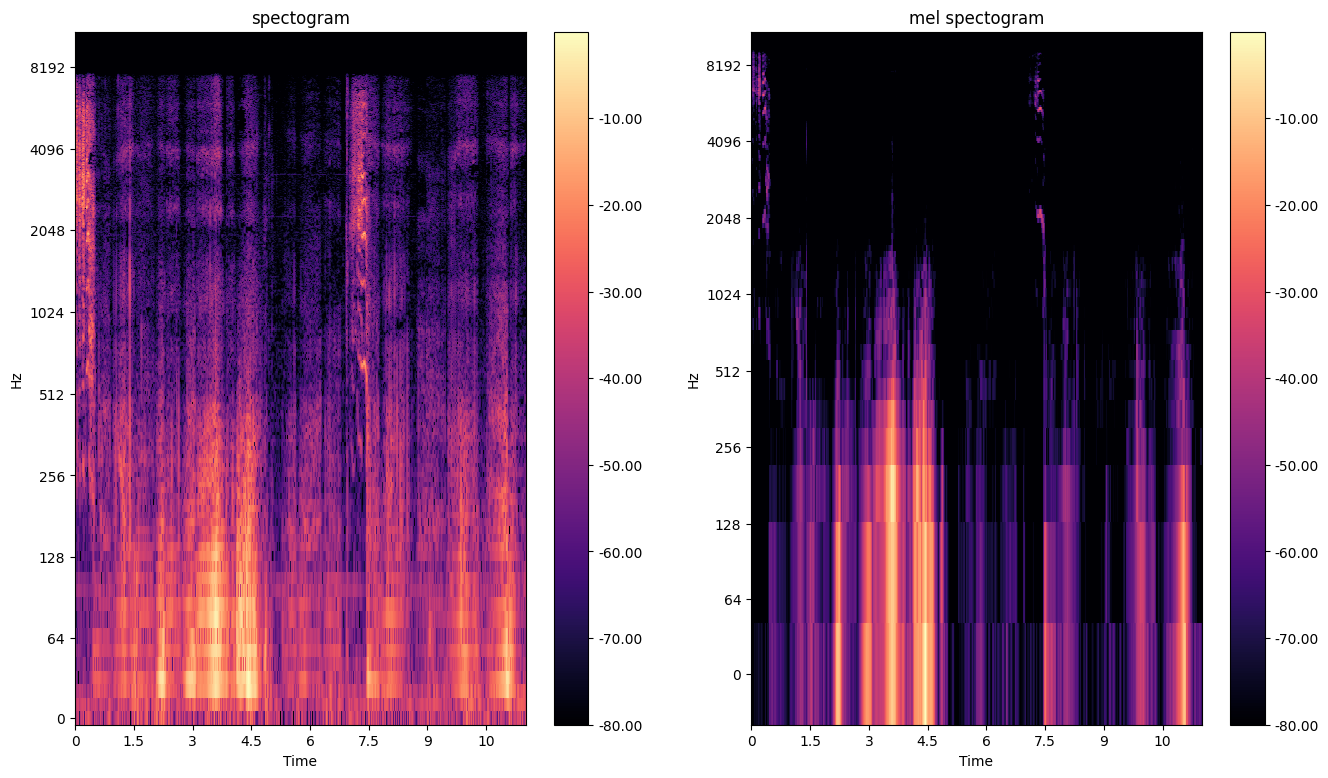

In [111]:
## genreate spectograms
amp = librosa.stft(y1)
amp_db = librosa.amplitude_to_db(np.abs(amp), ref=np.max)
amp_db.shape #(1025, 496)

# generate mel spectograms
mel_amp = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128)
mel_amp_db = librosa.amplitude_to_db(mel_amp, ref=np.max)

# plot spectogram
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
librosa.display.specshow(amp_db, y_axis="log", x_axis="time", ax=axs[0])
axs[0].set_title("spectogram")
librosa.display.specshow(mel_amp_db, y_axis="log", x_axis="time", ax=axs[1])
axs[1].set_title("mel spectogram")
fig.colorbar(img, ax=axs[0], format=f'%0.2f')
fig.colorbar(img, ax=axs[1], format=f'%0.2f')

